In [1]:
from math import sqrt
from skimage import data, io
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import os
import random
import matplotlib.pyplot as plt

In [5]:
dataset_path = '../../data/vehicle-type-detection/'
fixed_path = '../../data/vehicle-type-detection/suv/PIC_78.jpg'

def select_random_image():
    categories = ['hatchback', 'motorcycle', 'pickup', 'sedan', 'suv']
    
    selected_category = random.choice(categories)
    
    category_path = os.path.join(dataset_path, selected_category)
    
    image_files = os.listdir(category_path)
    
    selected_image = random.choice(image_files)
    
    image_path = os.path.join(category_path, selected_image)
    
    return image_path

Method: Laplacian of Gaussian
Number of blobs detected: 313
Index X        Y        Radius  
0     32.00    56.00    1.41    
1     67.00    65.00    1.41    
2     84.00    51.00    10.53   
3     229.00   129.00   1.41    
4     73.00    47.00    1.41    
5     225.00   129.00   1.41    
6     221.00   129.00   1.41    
7     219.00   129.00   1.41    
8     215.00   129.00   1.41    
9     244.00   106.00   1.41    
10    141.00   151.00   1.41    
11    262.00   105.00   1.41    
12    315.00   146.00   1.41    
13    244.00   22.00    1.41    
14    269.00   105.00   1.41    
15    208.00   133.00   5.97    
16    286.00   108.00   1.41    
17    270.00   43.00    5.97    
18    227.00   107.00   1.41    
19    52.00    136.00   5.97    
20    255.00   108.00   1.41    
21    289.00   98.00    1.41    
22    266.00   169.00   1.41    
23    205.00   127.00   1.41    
24    231.00   107.00   1.41    
25    252.00   108.00   1.41    
26    250.00   105.00   1.41    
27    238.00   1

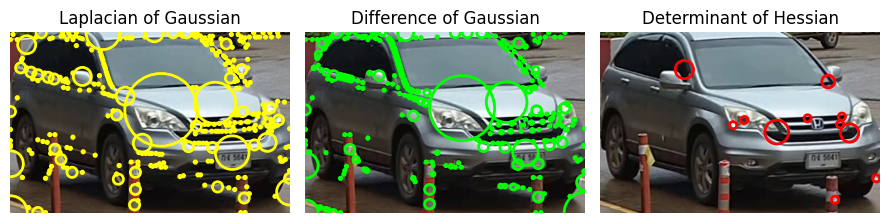

In [6]:
# image = io.imread(select_random_image())
image = io.imread(fixed_path)
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=0.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=0.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=0.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian', 'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    print(f"Method: {title}")
    print(f"Number of blobs detected: {len(blobs)}")
    print(f"{'Index':<5} {'X':<8} {'Y':<8} {'Radius':<8}")

    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for i, blob in enumerate(blobs):
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)

        print(f"{i:<5} {x:<8.2f} {y:<8.2f} {r:<8.2f}")
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()